TREĆI DIO

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.ensemble import RandomForestClassifier

from bartpy.sklearnmodel import SklearnModel
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import pearsonr
from sklearn import preprocessing 

import time

In [8]:
Withdrawn = {}
Fail = {}
Pass = {}
Distinction = {}

In [9]:
def decision_tree(df, value):
    X = df[['gender',	'age_band',	'highest_education',	'score'	,'date_registration',	'sum_click']]

    #df['final_result'] = label_encoder.fit_transform(df['final_result']) 
    df['binary_target'] = (df['final_result'] == value).astype(int)

    y = df['binary_target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = DecisionTreeClassifier()

    clf.fit(X_train, y_train)

    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    if value == 'Withdrawn':
        Withdrawn['precisionDT'] = accuracy
    if value == 'Fail':
        Fail['precisionDT'] = accuracy
    if value == 'Pass':
        Pass['precisionDT'] = accuracy
    if value == 'Distinction':
        Distinction['precisionDT'] = accuracy
 

In [10]:
def random_forest( value,df ):
    X = df[['gender',	'age_band',	'highest_education',	'score'	,'date_registration',	'sum_click']]

    #df['final_result'] = label_encoder.fit_transform(df['final_result']) 
    df['binary_target'] = (df['final_result'] == value).astype(int)

    y = df['binary_target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
    clf = RandomForestClassifier(n_estimators=10, random_state=42)  

    clf.fit(X_train, y_train)

    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
 
    
    if value == 'Withdrawn':
        Withdrawn['precisionRF'] = accuracy

    if value == 'Fail':
        Fail['precisionRF'] = accuracy

    if value == 'Pass':
        Pass['precisionRF'] = accuracy

    if value == 'Distinction':
        Distinction['precisionRF'] = accuracy

 

In [11]:
assessments = pd.read_csv("anonymisedData/assessments.csv")
courses = pd.read_csv("anonymisedData/courses.csv")
studentAssessment = pd.read_csv("anonymisedData/studentAssessment.csv")
studentInfo = pd.read_csv("anonymisedData/studentInfo.csv")
studentRegistration = pd.read_csv("anonymisedData/studentRegistration.csv")
studentVle = pd.read_csv("anonymisedData/studentVle.csv")
#vle = pd.read_csv("anonymisedData/vle.csv")

In [12]:
columns_studentInfo = ['id_student','gender', 'age_band', 'highest_education', 'final_result']
columns_studentAssessment = ['id_student','score']
columns_studentRegistration = ['id_student','date_registration']
columns_studentVle = [ 'id_student','sum_click']

merged_table_2 = pd.merge(studentInfo[columns_studentInfo],
                        studentAssessment[columns_studentAssessment],
                        on='id_student',
                        how='inner')
merged_table_2 = pd.merge(merged_table_2,
                        studentRegistration[columns_studentRegistration],
                        on='id_student',
                        how='inner')

studentVle_sum = studentVle.groupby('id_student')['sum_click'].sum().reset_index()
merged_table_2 = pd.merge(merged_table_2,
                        studentVle_sum[columns_studentVle],
                        on='id_student',
                        how='inner')

merged_table_2.dropna(inplace=True)
merged_table_2.drop('id_student',axis=1)

df = pd.DataFrame(merged_table_2)
df = df.head(10000)

label_encoder = preprocessing.LabelEncoder() 
df['gender'] = label_encoder.fit_transform(df['gender']) 
df['age_band'] = label_encoder.fit_transform(df['age_band']) 
df['highest_education'] = label_encoder.fit_transform(df['highest_education']) 

values =['Withdrawn','Fail','Pass','Distinction']
Withdrawn = {}
Fail = {}
Pass = {}
Distinction = {}

start_time = time.time()
for i in values:
   decision_tree(df, i, )
   random_forest(i, df)

end_time = time.time()
execution_time_1 = end_time - start_time


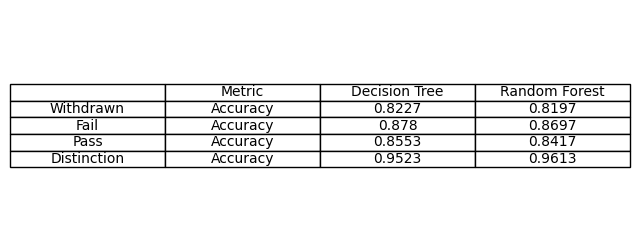

Execution time: 0.620668888092041 seconds


In [13]:
table3_list = [
    ['','Metric', 'Decision Tree' ,'Random Forest'],
    ['Withdrawn','Accuracy',Withdrawn['precisionDT'],Withdrawn['precisionRF']],

    ['Fail','Accuracy',Fail['precisionDT'],Fail['precisionRF']],
    
    ['Pass','Accuracy',Pass['precisionDT'],Pass['precisionRF']],
    
    ['Distinction','Accuracy',Distinction['precisionDT'],Distinction['precisionRF']],

]

for i in range(0, len(table3_list)):
    for j in range(0, len(table3_list[i])):
        if type(table3_list[i][j]) != str:
            table3_list[i][j] = round(table3_list[i][j],4)

fig, ax = plt.subplots(figsize=(8, 3))

ax.axis('off')

table = ax.table(cellText=table3_list, loc='center', cellLoc='center', colLabels=None)

plt.show()
print(f"Execution time: {execution_time_1} seconds")


zamjena nedostajućih vrijednosti sa srednjim vrijednostima

In [14]:
assessments = pd.read_csv("anonymisedData/assessments.csv")
courses = pd.read_csv("anonymisedData/courses.csv")
studentAssessment = pd.read_csv("anonymisedData/studentAssessment.csv")
studentInfo = pd.read_csv("anonymisedData/studentInfo.csv")
studentRegistration = pd.read_csv("anonymisedData/studentRegistration.csv")
studentVle = pd.read_csv("anonymisedData/studentVle.csv")
#vle = pd.read_csv("anonymisedData/vle.csv")

In [15]:
#DODANO
null_scores = studentAssessment['score'].isnull()

mean_score = studentAssessment.loc[~null_scores, 'score'].mean()

studentAssessment.loc[null_scores, 'score'] = mean_score

#DODANO

null_date = studentRegistration['date_registration'].isnull()

mean_date = studentRegistration.loc[~null_scores, 'date_registration'].mean()

studentRegistration.loc[null_date, 'date_registration'] = mean_date

In [16]:
columns_studentInfo = ['id_student','gender', 'age_band', 'highest_education', 'final_result']
columns_studentAssessment = ['id_student','score']
columns_studentRegistration = ['id_student','date_registration']
columns_studentVle = [ 'id_student','sum_click']

merged_table_2 = pd.merge(studentInfo[columns_studentInfo],
                        studentAssessment[columns_studentAssessment],
                        on='id_student',
                        how='inner')
merged_table_2 = pd.merge(merged_table_2,
                        studentRegistration[columns_studentRegistration],
                        on='id_student',
                        how='inner')

studentVle_sum = studentVle.groupby('id_student')['sum_click'].sum().reset_index()
merged_table_2 = pd.merge(merged_table_2,
                        studentVle_sum[columns_studentVle],
                        on='id_student',
                        how='inner')

#merged_table_2.dropna(inplace=True)
merged_table_2.drop('id_student',axis=1)

df = pd.DataFrame(merged_table_2)
df = df.head(10000)

label_encoder = preprocessing.LabelEncoder() 
df['gender'] = label_encoder.fit_transform(df['gender']) 
df['age_band'] = label_encoder.fit_transform(df['age_band']) 
df['highest_education'] = label_encoder.fit_transform(df['highest_education']) 

values =['Withdrawn','Fail','Pass','Distinction']

   
start_time = time.time()
for i in values:
   decision_tree(df, i, )
   random_forest(i, df)

end_time = time.time()
execution_time_2 = end_time - start_time

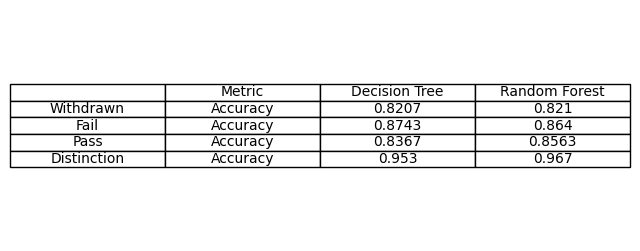

Execution time: 1.3883397579193115 seconds


In [17]:
table3_list = [
    ['','Metric', 'Decision Tree' ,'Random Forest'],
    ['Withdrawn','Accuracy',Withdrawn['precisionDT'],Withdrawn['precisionRF']],

    
    ['Fail','Accuracy',Fail['precisionDT'],Fail['precisionRF']],

    
    ['Pass','Accuracy',Pass['precisionDT'],Pass['precisionRF']],

    
    ['Distinction','Accuracy',Distinction['precisionDT'],Distinction['precisionRF']],

]

for i in range(0, len(table3_list)):
    for j in range(0, len(table3_list[i])):
        if type(table3_list[i][j]) != str:
            table3_list[i][j] = round(table3_list[i][j],4)

fig, ax = plt.subplots(figsize=(8, 3))

ax.axis('off')

table = ax.table(cellText=table3_list, loc='center', cellLoc='center', colLabels=None)

plt.show()

print(f"Execution time: {execution_time_2} seconds")


zamjena nedostajućih sa najčešćom vrijednosti

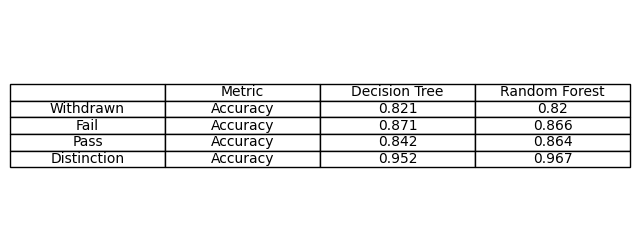

Execution time: 1.5340280532836914 seconds


In [18]:
assessments = pd.read_csv("anonymisedData/assessments.csv")
courses = pd.read_csv("anonymisedData/courses.csv")
studentAssessment = pd.read_csv("anonymisedData/studentAssessment.csv")
studentInfo = pd.read_csv("anonymisedData/studentInfo.csv")
studentRegistration = pd.read_csv("anonymisedData/studentRegistration.csv")
studentVle = pd.read_csv("anonymisedData/studentVle.csv")
#vle = pd.read_csv("anonymisedData/vle.csv")

#DODANO
null_scores = studentAssessment['score'].isnull()

mode_score = studentAssessment.loc[~null_scores, 'score'].mode().iloc[0]

studentAssessment.loc[null_scores, 'score'] = mode_score

#DODANO

null_date = studentRegistration['date_registration'].isnull()

mode_date = studentRegistration.loc[~null_scores, 'date_registration'].mode().iloc[0]

studentRegistration.loc[null_date, 'date_registration'] = mode_date

columns_studentInfo = ['id_student','gender', 'age_band', 'highest_education', 'final_result']
columns_studentAssessment = ['id_student','score']
columns_studentRegistration = ['id_student','date_registration']
columns_studentVle = [ 'id_student','sum_click']

merged_table_2 = pd.merge(studentInfo[columns_studentInfo],
                        studentAssessment[columns_studentAssessment],
                        on='id_student',
                        how='inner')
merged_table_2 = pd.merge(merged_table_2,
                        studentRegistration[columns_studentRegistration],
                        on='id_student',
                        how='inner')

studentVle_sum = studentVle.groupby('id_student')['sum_click'].sum().reset_index()
merged_table_2 = pd.merge(merged_table_2,
                        studentVle_sum[columns_studentVle],
                        on='id_student',
                        how='inner')

#merged_table_2.dropna(inplace=True)
merged_table_2.drop('id_student',axis=1)

df = pd.DataFrame(merged_table_2)
df = df.head(10000)


label_encoder = preprocessing.LabelEncoder() 
df['gender'] = label_encoder.fit_transform(df['gender']) 
df['age_band'] = label_encoder.fit_transform(df['age_band']) 
df['highest_education'] = label_encoder.fit_transform(df['highest_education']) 

values =['Withdrawn','Fail','Pass','Distinction']

start_time = time.time()
for i in values:
   decision_tree(df, i, )
   random_forest(i, df)

end_time = time.time()
execution_time_3 = end_time - start_time
   
table3_list = [
    ['','Metric', 'Decision Tree' ,'Random Forest'],
    ['Withdrawn','Accuracy',Withdrawn['precisionDT'],Withdrawn['precisionRF']],

    
    ['Fail','Accuracy',Fail['precisionDT'],Fail['precisionRF']],

    
    ['Pass','Accuracy',Pass['precisionDT'],Pass['precisionRF']],

    
    ['Distinction','Accuracy',Distinction['precisionDT'],Distinction['precisionRF']],

]

for i in range(0, len(table3_list)):
    for j in range(0, len(table3_list[i])):
        if type(table3_list[i][j]) != str:
            table3_list[i][j] = round(table3_list[i][j],3)

fig, ax = plt.subplots(figsize=(8, 3))

ax.axis('off')

table = ax.table(cellText=table3_list, loc='center', cellLoc='center', colLabels=None)

plt.show()

print(f"Execution time: {execution_time_3} seconds")

sa xgboost

In [19]:
import xgboost as xgb
import sklearn.metrics as metrics

In [20]:
def xgboost_model(df, value):
    X = df[['gender', 'age_band', 'highest_education', 'score', 'date_registration', 'sum_click']]

    label_encoder = preprocessing.LabelEncoder()
    df['binary_target'] = (df['final_result'] == value).astype(int)
    y = df['binary_target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    precision, recall, f1_score, support = metrics.precision_recall_fscore_support(y_test, predictions, average='weighted')

    if value == 'Withdrawn':
        Withdrawn['precisionXGB'] = precision
    if value == 'Fail':
        Fail['precisionXGB'] = precision
    if value == 'Pass':
        Pass['precisionXGB'] = precision
    if value == 'Distinction':
        Distinction['precisionXGB'] = precision


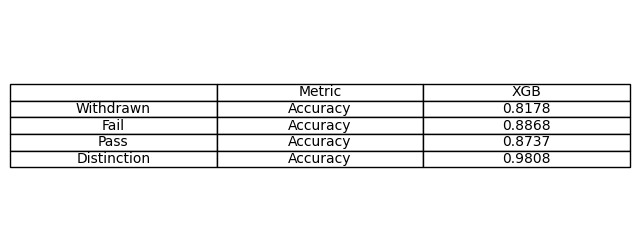

Execution time: 0.34500837326049805 seconds


In [21]:


assessments = pd.read_csv("anonymisedData/assessments.csv")
courses = pd.read_csv("anonymisedData/courses.csv")
studentAssessment = pd.read_csv("anonymisedData/studentAssessment.csv")
studentInfo = pd.read_csv("anonymisedData/studentInfo.csv")
studentRegistration = pd.read_csv("anonymisedData/studentRegistration.csv")
studentVle = pd.read_csv("anonymisedData/studentVle.csv")
#vle = pd.read_csv("anonymisedData/vle.csv")



columns_studentInfo = ['id_student','gender', 'age_band', 'highest_education', 'final_result']
columns_studentAssessment = ['id_student','score']
columns_studentRegistration = ['id_student','date_registration']
columns_studentVle = [ 'id_student','sum_click']

merged_table_2 = pd.merge(studentInfo[columns_studentInfo],
                        studentAssessment[columns_studentAssessment],
                        on='id_student',
                        how='inner')
merged_table_2 = pd.merge(merged_table_2,
                        studentRegistration[columns_studentRegistration],
                        on='id_student',
                        how='inner')

studentVle_sum = studentVle.groupby('id_student')['sum_click'].sum().reset_index()
merged_table_2 = pd.merge(merged_table_2,
                        studentVle_sum[columns_studentVle],
                        on='id_student',
                        how='inner')

merged_table_2.dropna(inplace=True)
merged_table_2.drop('id_student',axis=1)

df = pd.DataFrame(merged_table_2)
df = df.head(10000)

label_encoder = preprocessing.LabelEncoder() 
df['gender'] = label_encoder.fit_transform(df['gender']) 
df['age_band'] = label_encoder.fit_transform(df['age_band']) 
df['highest_education'] = label_encoder.fit_transform(df['highest_education']) 

values =['Withdrawn','Fail','Pass','Distinction']


Withdrawn = {}
Fail = {}
Pass = {}
Distinction = {}

start_time = time.time()

for i in values:
   xgboost_model(df, i)
end_time = time.time()
execution_time_3 = end_time - start_time
   
table3_list = [
    ['','Metric', 'XGB' ],
    ['Withdrawn','Accuracy',Withdrawn['precisionXGB']],
    
    ['Fail','Accuracy', Fail['precisionXGB']],
    
    ['Pass','Accuracy',Pass['precisionXGB']],
    
    ['Distinction','Accuracy',Distinction['precisionXGB']],

]

for i in range(0, len(table3_list)):
    for j in range(0, len(table3_list[i])):
        if type(table3_list[i][j]) != str:
            table3_list[i][j] = round(table3_list[i][j],4)

fig, ax = plt.subplots(figsize=(8, 3))

ax.axis('off')

table = ax.table(cellText=table3_list, loc='center', cellLoc='center', colLabels=None)

plt.show()
print(f"Execution time: {execution_time_3} seconds")

In [22]:
from sklearn import metrics

svc

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

def svm_model(df, value):
    X = df[['gender', 'age_band', 'highest_education', 'score', 'date_registration', 'sum_click']]

    label_encoder = preprocessing.LabelEncoder()
    df['binary_target'] = (df['final_result'] == value).astype(int)
    y = df['binary_target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    svc_model =  SVC(kernel='linear', C=1.0)
    svc_model.fit(X_train_scaled, y_train)
    predictions = svc_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)    

    if value == 'Withdrawn':
        Withdrawn['precisionSVC'] = accuracy
    elif value == 'Fail':
        Fail['precisionSVC'] = accuracy
    elif value == 'Pass':
        Pass['precisionSVC'] = accuracy
    elif value == 'Distinction':
        Distinction['precisionSVC'] = accuracy



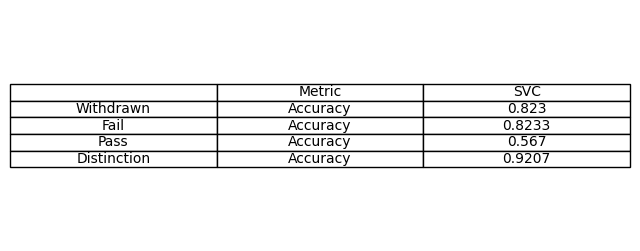

Execution time: 2.6146726608276367 seconds


In [24]:
assessments = pd.read_csv("anonymisedData/assessments.csv")
courses = pd.read_csv("anonymisedData/courses.csv")
studentAssessment = pd.read_csv("anonymisedData/studentAssessment.csv")
studentInfo = pd.read_csv("anonymisedData/studentInfo.csv")
studentRegistration = pd.read_csv("anonymisedData/studentRegistration.csv")
studentVle = pd.read_csv("anonymisedData/studentVle.csv")
#vle = pd.read_csv("anonymisedData/vle.csv")


columns_studentInfo = ['id_student','gender', 'age_band', 'highest_education', 'final_result']
columns_studentAssessment = ['id_student','score']
columns_studentRegistration = ['id_student','date_registration']
columns_studentVle = [ 'id_student','sum_click']

merged_table_2 = pd.merge(studentInfo[columns_studentInfo],
                        studentAssessment[columns_studentAssessment],
                        on='id_student',
                        how='inner')
merged_table_2 = pd.merge(merged_table_2,
                        studentRegistration[columns_studentRegistration],
                        on='id_student',
                        how='inner')

studentVle_sum = studentVle.groupby('id_student')['sum_click'].sum().reset_index()
merged_table_2 = pd.merge(merged_table_2,
                        studentVle_sum[columns_studentVle],
                        on='id_student',
                        how='inner')

merged_table_2.dropna(inplace=True)
merged_table_2.drop('id_student',axis=1)

df = pd.DataFrame(merged_table_2)
df = df.head(10000)

label_encoder = preprocessing.LabelEncoder() 
df['gender'] = label_encoder.fit_transform(df['gender']) 
df['age_band'] = label_encoder.fit_transform(df['age_band']) 
df['highest_education'] = label_encoder.fit_transform(df['highest_education']) 

values =['Withdrawn','Fail','Pass','Distinction']


Withdrawn = {}
Fail = {}
Pass = {}
Distinction = {}

start_time = time.time()
for i in values:
   svm_model(df, i)
end_time = time.time()
execution_time_4 = end_time - start_time
   
table3_list = [
    ['','Metric', 'SVC' ],
    ['Withdrawn','Accuracy',Withdrawn['precisionSVC']],
    
    ['Fail','Accuracy', Fail['precisionSVC']],
    
    ['Pass','Accuracy',Pass['precisionSVC']],
    
    ['Distinction','Accuracy',Distinction['precisionSVC']],

]


for i in range(0, len(table3_list)):
    for j in range(0, len(table3_list[i])):
        if type(table3_list[i][j]) != str:
            table3_list[i][j] = round(table3_list[i][j],4)
        

fig, ax = plt.subplots(figsize=(8, 3))

ax.axis('off')

table = ax.table(cellText=table3_list, loc='center', cellLoc='center', colLabels=None)

plt.show()
print(f"Execution time: {execution_time_4} seconds")

decisin tree rezano

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict

def decision_tree_2(df, value):
    X = df[['gender', 'age_band', 'highest_education', 'score', 'date_registration', 'sum_click']]
    df['binary_target'] = (df['final_result'] == value).astype(int)
    y = df['binary_target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    X_train_standardized = scaler.fit_transform(X_train)
    X_test_standardized = scaler.transform(X_test)

    param_grid = {
        'max_depth': [3, 5, 7, 9],
        'min_samples_split': [3, 7, 5, 9],
        'min_samples_leaf': [1, 3, 5, 7],
        'max_features': ['sqrt', 'log2', None]
    }

    grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
    grid_search.fit(X_train_standardized, y_train)

    best_params = grid_search.best_params_
    print('best_params:', best_params)

    optimized_model = DecisionTreeClassifier(**best_params)
    optimized_model.fit(X_train_standardized, y_train)

    y_pred = cross_val_predict(optimized_model, X_test_standardized, y_test, cv=5)

    accuracy = accuracy_score(y_test, y_pred)
    if value == 'Withdrawn':
        Withdrawn['precisionDT2'] = accuracy
    elif value == 'Fail':
        Fail['precisionDT2'] = accuracy
    elif value == 'Pass':
        Pass['precisionDT2'] = accuracy
    elif value == 'Distinction':
        Distinction['precisionDT2'] = accuracy




In [26]:
assessments = pd.read_csv("anonymisedData/assessments.csv")
courses = pd.read_csv("anonymisedData/courses.csv")
studentAssessment = pd.read_csv("anonymisedData/studentAssessment.csv")
studentInfo = pd.read_csv("anonymisedData/studentInfo.csv")
studentRegistration = pd.read_csv("anonymisedData/studentRegistration.csv")
studentVle = pd.read_csv("anonymisedData/studentVle.csv")
#vle = pd.read_csv("anonymisedData/vle.csv")


columns_studentInfo = ['id_student','gender', 'age_band', 'highest_education', 'final_result']
columns_studentAssessment = ['id_student','score']
columns_studentRegistration = ['id_student','date_registration']
columns_studentVle = [ 'id_student','sum_click']

merged_table_2 = pd.merge(studentInfo[columns_studentInfo],
                        studentAssessment[columns_studentAssessment],
                        on='id_student',
                        how='inner')
merged_table_2 = pd.merge(merged_table_2,
                        studentRegistration[columns_studentRegistration],
                        on='id_student',
                        how='inner')

studentVle_sum = studentVle.groupby('id_student')['sum_click'].sum().reset_index()
merged_table_2 = pd.merge(merged_table_2,
                        studentVle_sum[columns_studentVle],
                        on='id_student',
                        how='inner')

merged_table_2.dropna(inplace=True)
merged_table_2.drop('id_student',axis=1)

df = pd.DataFrame(merged_table_2)
df = df.head(10000)

label_encoder = preprocessing.LabelEncoder() 
df['gender'] = label_encoder.fit_transform(df['gender']) 
df['age_band'] = label_encoder.fit_transform(df['age_band']) 
df['highest_education'] = label_encoder.fit_transform(df['highest_education']) 

values =['Withdrawn','Fail','Pass','Distinction']


Withdrawn = {}
Fail = {}
Pass = {}
Distinction = {}

start_time = time.time()
for i in values:
   decision_tree_2(df, i)
end_time = time.time()
execution_time_5 = end_time - start_time
   

best_params: {'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 3}
best_params: {'max_depth': 9, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 3}
best_params: {'max_depth': 9, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
best_params: {'max_depth': 9, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 3}


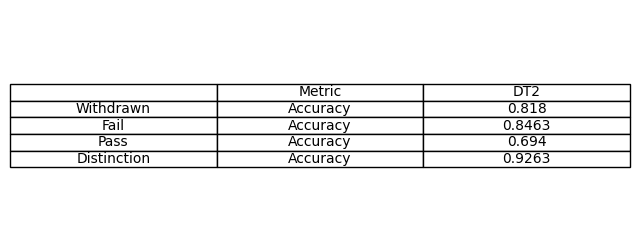

Execution time: 23.900840520858765 seconds


In [27]:
table3_list = [
    ['','Metric', 'DT2' ],
    ['Withdrawn','Accuracy',Withdrawn['precisionDT2']],
    
    ['Fail','Accuracy', Fail['precisionDT2']],
    
    ['Pass','Accuracy',Pass['precisionDT2']],
    
    ['Distinction','Accuracy',Distinction['precisionDT2']],

]


for i in range(0, len(table3_list)):
    for j in range(0, len(table3_list[i])):
        if type(table3_list[i][j]) != str:
            table3_list[i][j] = round(table3_list[i][j],4)

fig, ax = plt.subplots(figsize=(8, 3))

ax.axis('off')

table = ax.table(cellText=table3_list, loc='center', cellLoc='center', colLabels=None)

plt.show()
print(f"Execution time: {execution_time_5} seconds")